# Unfamiliar SVMs with a Familiar Dataset

To motivate our basic understandings of SVMs, lets explore SVMs through our favorite iris dataset.

In [1]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
iris = datasets.load_iris() 

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [7]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Pretty standard procedure so far. We've created a design matrix X, and a vector of responses y.

We'll also fit, predict, score, etc. in the same way as other sklearn models. Let's take a look at the SVC arguments...

In [9]:
# Let's look at some of the parameters
model = svm.SVC() 

In [10]:
model.fit(X,y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# Pretty good, though we kind of expected this
model.score(X,y) 

0.98666666666666669

In [13]:
# How many support vectors exist for each class
model.n_support_

array([ 7, 19, 19], dtype=int32)

In [14]:
# Indices of the support vectors
model.support_

array([ 13,  15,  18,  23,  24,  41,  44,  50,  52,  54,  56,  57,  60,
        63,  66,  68,  70,  72,  76,  77,  78,  83,  84,  85,  86,  98,
       100, 106, 110, 118, 119, 121, 123, 126, 127, 129, 131, 133, 134,
       138, 141, 142, 146, 147, 149], dtype=int32)

In [17]:
# Locations of the support vectors
model.support_vectors_

array([[ 4.3,  3. ,  1.1,  0.1],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 4.5,  2.3,  1.3,  0.3],
       [ 5.1,  3.8,  1.9,  0.4],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 6.5,  2.8,  4.6,  1.5],
       [ 6.3,  3.3,  4.7,  1.6],
       [ 4.9,  2.4,  3.3,  1. ],
       [ 5. ,  2. ,  3.5,  1. ],
       [ 6.1,  2.9,  4.7,  1.4],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 6.2,  2.2,  4.5,  1.5],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 6.3,  2.5,  4.9,  1.5],
       [ 6.8,  2.8,  4.8,  1.4],
       [ 6.7,  3. ,  5. ,  1.7],
       [ 6. ,  2.9,  4.5,  1.5],
       [ 6. ,  2.7,  5.1,  1.6],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 6. ,  3.4,  4.5,  1.6],
       [ 6.7,  3.1,  4.7,  1.5],
       [ 5.1,  2.5,  3. ,  1.1],
       [ 6.3,  3.3,  6. ,  2.5],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 7.7,  2.6,  6.9,  2.3],
       [ 6

# Plotting Decision Boundaries

We are going to explore what happens to the **decision boundary** and **support vectors** as we change C, kernel, and kernel parameters.

In [24]:
X = iris.data[:,[0,2]]
y = iris.target

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# of Support Vectors Per Class: [ 5 18 19]


In [25]:
# Create a grid of points to predict over
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# of Support Vectors Per Class: [ 4  7 12]


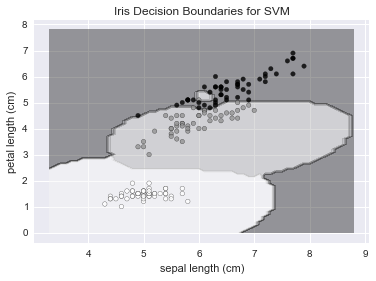

In [49]:
model = svm.SVC(C=100000000)
model.fit(X,y)
print "# of Support Vectors Per Class:", model.n_support_

Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape) 


plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)
plt.xlabel(iris.feature_names[0]), plt.ylabel(iris.feature_names[2])
plt.title("Iris Decision Boundaries for SVM")

# Exercise

1. Use the "rbf" (radial basis function) kernel in creating svm.SVC classifier. This is the gaussian drop off we learned.
  1. Modulate the gamma parameter from .001 to 100. Observe what happens to the number of support vectors as well as the shape of the decision boundaries as you increase gamma?
  2. How does this relate to our conversation of underfitting/overfitting?
2. Using the same "rbf" kernel, do not supply an argument for gamma. This automatically sets gamma = 1 / n_features.
  1. Now, modulate "C" from .1 to 1 to 1000. What happens to the decision boundaries? C is the penalty parameter of the errors. High C tells the SVM to work harder to find a less imperfect boundary.
3. If you finish early, explore using the "poly" (polynomial degree--requires the "degree" parameter), as well as the "linear" kernel.

There are also other SVM classifiers within sklearn including LinearSVC. LinearSVC is slightly different from SVM with a linear kernel.

More information here: http://scikit-learn.org/stable/modules/svm.html#svm

# Hyperparameter search

Ah, so we've seen that in the case of "rbf" or radial basis kernels, we have to modulate the C parameter of the SVM, which modulates how much errors should be avoided. We also have to modulate gamma, which dictates the width of the gaussian kernels.

We're going to use GridSearchCV to search for both parameters. In addition, we're going to finalize our example. Remember that SVM uses distance features but we have not normalized any of our features!! We'll start doing that

In [50]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

from sklearn.preprocessing import StandardScaler

In [51]:
X = iris.data
y = iris.target
X[0:5,0:2]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6]])

In [52]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 
X[0:5,0:2]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019]])

In [54]:
# Let's confirm...
print np.mean(X,axis=0)
print np.var(X,axis=0) 

[ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15]
[ 1.  1.  1.  1.]


In [61]:
# We're going to create a space of C and gamma values to grid search over
# And then map it to a dictionary 

C_range = np.logspace(-3, 10, 13) 
gamma_range = np.logspace(-13, 3, 13) 
kernel_range=["linear","rbf","poly"]
param_grid = dict(gamma=gamma_range, C=C_range,kernel=kernel_range)
param_grid

{'C': array([  1.00000000e-03,   1.21152766e-02,   1.46779927e-01,
          1.77827941e+00,   2.15443469e+01,   2.61015722e+02,
          3.16227766e+03,   3.83118685e+04,   4.64158883e+05,
          5.62341325e+06,   6.81292069e+07,   8.25404185e+08,
          1.00000000e+10]),
 'gamma': array([  1.00000000e-13,   2.15443469e-12,   4.64158883e-11,
          1.00000000e-09,   2.15443469e-08,   4.64158883e-07,
          1.00000000e-05,   2.15443469e-04,   4.64158883e-03,
          1.00000000e-01,   2.15443469e+00,   4.64158883e+01,
          1.00000000e+03]),
 'kernel': ['linear', 'rbf', 'poly']}

In [62]:
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)  

KeyboardInterrupt: 

In [58]:
print "Best Params:", grid.best_params_
print "Best Score:", grid.best_score_

Best Params: {'C': 38311.868495572853, 'gamma': 1.0000000000000001e-05}
Best Score: 0.986666666667


In [59]:
# Let's see how the score changes over range of C and gamma
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

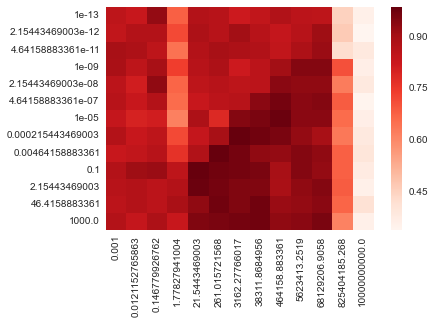

In [60]:
sb.heatmap( scores,xticklabels=C_range,yticklabels=gamma_range,cmap=plt.cm.Reds)